# HW 2 - 1D Cellular Automata
Please submit the modified file as your completed homework. Name the file firstname_lastname-HW1.ipynb

As we discussed even these very abstract models can be used to simulate real biological systems. The excercises today are an attempt to get you to a place where you are representing a real system in a simulation for the first time.

Don't forget to comment your code!


## Excercise 1
Implement a 1 D cellular automata as was described in the lecture and demonstrate a rule-set configuration that displays complexity. In a comment justify why you think that particular configuration constitutes a "complex" result. 

Functions and expected outputs:

rules: Sets the rules for your universe as shown in class. Input=(left, home, right, config) where left, home and right are type int and config is an array. Output=Value from config depending on how you defined rules. Values for config should be either 0 or 1

generate: Generates a universe as discussed in class. Input=(unvierse, config) where universe is a Numpy array of only/both 0s and 1s and configs is the same as defined above. Output=newuniverse where newuniverse is a Numpy array.

num_2_binary_arr(num): Input=integer number, Output=Numpy array of 1s and 0s AKA the binary representation of the integer. Use this to generate config. 

Show complexity by running and displaying multiple generations of your universe as shown in the image below

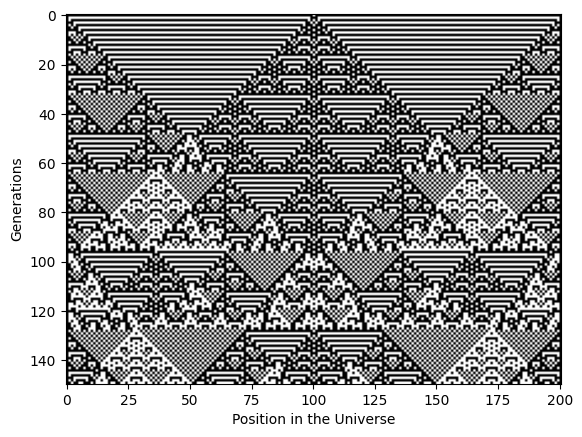

In [115]:
#Your code here
#Image of expected output: multiple generations of 1D universe shown as a single image using rule 105 
import numpy as np
import matplotlib.pyplot as plt

def num2binArray(num):

    binstr = np.binary_repr(num, width = 8)
    binArray = np.empty(0)

    for i in binstr:
        binArray = np.append(binArray,int(i))

    return np.flip(binArray)


def generate(universe, config):

    newuniverse = np.zeros((1, universe.size))

    for i in np.arange(universe.size):

        if (i != 0) & (i != universe.size - 1):

            left = universe[0, i-1]
            home = universe[0, i]
            right = universe[0, i+1]

            newuniverse[0, i] = rules(left, home, right, config)

    return newuniverse


def rules(left, home, right, config):

    if (left == 0) & (home == 0) & (right == 0):
        return config[0]
    if (left == 1) & (home == 0) & (right == 0):
        return config[1]
    if (left == 0) & (home == 1) & (right == 0):
        return config[2]
    if (left == 1) & (home == 1) & (right == 0):
        return config[3]
    if (left == 0) & (home == 0) & (right == 1):
        return config[4]
    if (left == 1) & (home == 0) & (right == 1):
        return config[5]
    if (left == 0) & (home == 1) & (right == 1):
        return config[6]
    if (left == 1) & (home == 1) & (right == 1):
        return config[7]





t = 150

config = num2binArray(105)
# Pattern is 'complex' as it is neither uniform nor repeated, simply a combination of both

universe = np.zeros((1, 201))
universe[0,100] = 1

stateMemory = np.zeros((t, universe.size))

for i in range(t):
    stateMemory[i,:] = universe
    newuniverse = generate(universe, config)
    universe = newuniverse

plt.axis('on')
plt.ylabel("Generations")
plt.xlabel("Position in the Universe")
plt.imshow(stateMemory, cmap = 'gray')



In [107]:
universe.size

201

In our example, with slight modifications upon the rules and binary configuration from the number 105, a complex output is outputted. At a first glance, there seems to be a pattern of triangles and symmetry, but as the model progresses, the triangles become more distorted showcasing its increasing complexity.

## Excercise 2

Alter the `generate` function so that you have "wrap around" boundary conditions. Meaning that the left most cell uses the right most cell as its 'left' and the right most cell uses the left most cell as its 'right'. Call this function `generate_alt` that takes the same inputs as `generate` but includes the wrap around conditions.

Show an example of a configuration where the boundary conditions change the result and also one where they do not.

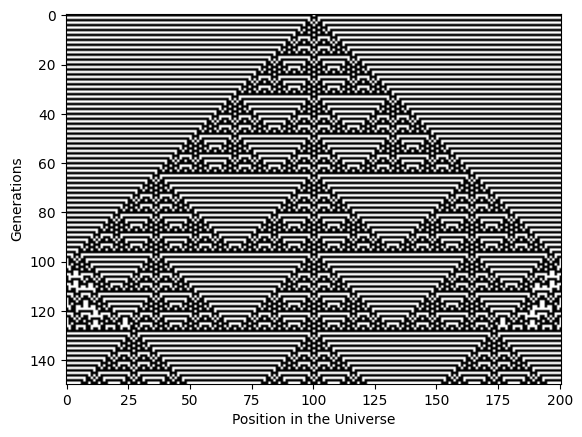

In [110]:

def generate_alt(universe, config):
    newuniverse = np.zeros((1, universe.size))

    for i in np.arange(universe.size):

        if (i != 0) & (i != universe.size - 1):

            left  = universe[0, i-1]
            home  = universe[0, i]
            right = universe[0, i+1]

            newuniverse[0, i] = rules(left, home, right, config)

        if (i == 0):

            left  = universe[0, universe.size - 1]
            home  = universe[0, i]
            right = universe[0, i+1]

            newuniverse[0, i] = rules(left, home, right, config)

        if (i == universe.size - 1):

            left  = universe[0, i-1]
            home  = universe[0, i]
            right = universe[0, 0]

            newuniverse[0, i] = rules(left, home, right, config)

            
    return newuniverse

t = 150

config = num2binArray(105)

universe = np.zeros((1, 201))
universe[0, 100] = 1

stateMemory = np.zeros((t, universe.size))

for i in range(t):
    stateMemory[i,:] = universe
    newuniverse = generate_alt(universe, config)
    universe = newuniverse

plt.axis('on')
plt.ylabel("Generations")
plt.xlabel("Position in the Universe")
plt.imshow(stateMemory, cmap = 'gray')


## Excercise 3

With wrap-around boundary conditions simulate rule 30 on a universe of width 1001 for 1000 generations. What will the central cell (500th) be on the 1001 generation? Comment on if there is any way that you could predict what this cell would be without running the simulation. 

In [121]:
t = 1000

config = num2binArray(30)

universe = np.zeros((1, 1001))
universe[0,500] = 1

stateMemory = np.zeros((t, universe.size))

for i in range(t):
    stateMemory[i,:] = universe
    newuniverse = generate_alt(universe, config)
    universe = newuniverse

print(f'500th cell is: {newuniverse[0, 501]}')


# Potentially predict this using the config, neighborhood, and size of the universe


500th cell is: 1.0


## Excercise 4
Predator-prey dynamics can be modeled using CA. 
Make a model of predator-prey interactions with 3 states. 0 is empty space, 1 is rabbits, and 2 is foxes. 

Hint: With three states there should 3^3 = 27 neighborhoods. I would advise you to HAND WRITE all the scenarios first on paper before beginging to program

Design your rule-set such that paired rabbits multiply, foxes next to rabbits eat the rabbits and become more foxes, isolated rabbits live, isolated foxes die. Run the simulation for 100 timpoints over a universe that is length 100 starting with random initial conditions. Who wins? 

For prettier simulations try any of the following colormaps in cmap argument: 'viridis', 'plasma', 'inferno', 'magma', 'cividis'

For example:


`plt.imshow(stateMemory, cmap = 'magma')`


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]


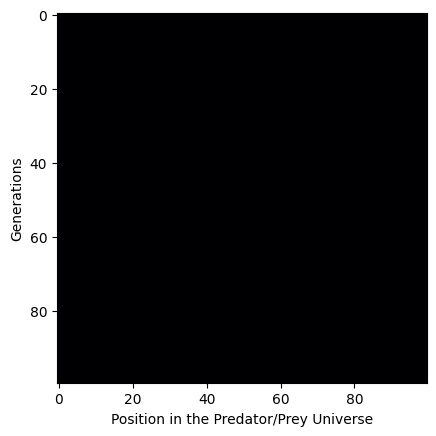

In [136]:
# 0 = empty space; 1 = rabbit; 2 = fox

# paired rabbits multiply
# foxes next to rabbits eat the rabbits and become more foxes
# isolated rabbits live
# isolated foxes die

#Your code here
#Image of expected output: multiple generations of 1D universe shown as a single image using rule 105 
import numpy as np
import matplotlib.pyplot as plt

def pred_prey_generate(pred_prey_universe):

    for i in np.arange(pred_prey_universe.size):

        if (i != 0) & (i != pred_prey_universe.size - 1):

            left = pred_prey_universe[0, i-1]
            home = pred_prey_universe[0, i]
            right = pred_prey_universe[0, i+1]

            pred_prey_newuniverse[0, i] = pred_prey_rules(left, home, right)

    return pred_prey_newuniverse


def pred_prey_rules(left, home, right):

    # empty space yields empty space
    if (left == 0) & (home == 0) & (right == 0):
        return 0

    # isolated foxes die
    if (left == 2) & (home == 0) & (right == 0):
        return 0

    # isolated foxes die
    if (left == 0) & (home == 2) & (right == 0):
        return 0

    # isolated foxes die
    if (left == 0) & (home == 0) & (right == 2):
        return 0

    # paired rabbits multiply
    if (left == 1) & (home == 1) & (right == 0):
        return 1

    # paired rabbits multiply
    if (left == 0) & (home == 1) & (right == 1):
        return 1

    # isolated rabbits live
    if (left == 1) & (home == 0) & (right == 0):
        return 1

    # isolated rabbits live
    if (left == 0) & (home == 1) & (right == 0):
        return 1

    # isolated rabbits live
    if (left == 0) & (home == 0) & (right == 1):
        return 1

    # foxes next to rabbits eat the rabbits and become more foxes
    if (left == 1) & (home == 2) & (right == 0):
        return 2

    # foxes next to rabbits eat the rabbits and become more foxes
    if (left == 0) & (home == 2) & (right == 1):
        return 2

    # foxes next to rabbits eat the rabbits and become more foxes
    if (left == 0) & (home == 1) & (right == 2):
        return 2

    # foxes next to rabbits eat the rabbits and become more foxes
    if (left == 2) & (home == 1) & (right == 0):
        return 2


t = 100

pred_prey_universe = np.zeros((1, 100))
pred_prey_universe[0,50] = 0

pred_prey_stateMemory = np.zeros((t, pred_prey_universe.size))

for i in range(t):
    pred_prey_stateMemory[i,:] = pred_prey_universe
    pred_prey_newuniverse = pred_prey_generate(pred_prey_universe)
    pred_prey_universe = pred_prey_newuniverse

print(pred_prey_newuniverse)

plt.axis('on')
plt.ylabel("Generations")
plt.xlabel("Position in the Predator/Prey Universe")
plt.imshow(stateMemory, cmap = 'magma')



Functions you will need to write for this problem are the following:

pred_pray_rules(left, home, right) which takes in left, home and right as ints ranging from 0-2, and returns either 0, 1 or 2 depending on the conditions describe by the fox rabbit rules above.

pred_pray_generate(universe): Input is a Numpy array containing ints ranging from 0-2 and output=newuniverse where new universe is a Numpy array containing ints ranging from 0-2 (Remember that the new universe should be generated using pred_pray_rules).

In [ ]:
#Your code here

With your conditions, do bunnies or foxes win? Can you come up with a universe where bunnies win and one where foxes win (for fun, just need one example of your code working for credit)

## Excercise 5

Run the predator prey model except make the rule predation of rabbits by foxes and multiplication of rabbits and foxes a probabilistic event. E.g. Only 20% of foxes interacting with rabbits are successful. Can you find probabilities where foxes and rabbits appear to coexist? Please comment on under what conditions having probabilistic rules would be more appropriate than deterministic rules?

Functions you should make:

pred_pray_rules_alt(left, home, right): Input and output is same as in Excercise 4 but the new rules should include the probability of a fox failing to interact with a rabbit.

pred_pray_generate_alt(universe): Input is a Numpy array containing ints ranging from 0-2 and output=newuniverse where newuniverse is generated using pred_pray_rules_alt.

In [ ]:
#Your code here

## Excercise 6 (Not optional for graduate students)

Simulate one of the following:
* Use a 1D cellular automaton to model the growth of a bacterial colony, taking into account factors such as cell division, death, and mutation.

* Use a 1D cellular automaton to simulate the spread of a virus in a population, considering factors such as infection rates, recovery rates, and mortality rates.

* Use a 1D cellular automaton to model a simple ecosystem, in which different species interact and compete for resources. Find parameters where cooperation emerges.

Functions you make here are up to you, but you must provide the logic for your rule set for credit.


In [5]:
#Code here

### Who did you work with:
* name 1
* name 2
* name 3